In [1]:
# Library import
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, scale
from sklearn.model_selection import KFold, train_test_split, cross_val_score
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
np.random.seed(123)
random.seed(123)

In [2]:
clean_df = pd.read_csv("cleaned_data.csv")

In [3]:
# Get categorical columns
cols = clean_df.columns
num_cols = clean_df._get_numeric_data().columns
cat_cols = list(set(cols) - set(num_cols))
cat_cols.append("Neoplasm_Histologic_Grade")
cat_cols.append("Tumor_Stage")
cat_cols

['HER2_status_measured_by_SNP6',
 'Oncotree_Code',
 'Primary_Tumor_Laterality',
 'Cellularity',
 'Pam50___Claudin_low_subtype',
 'Type_of_Breast_Surgery',
 'Cancer_Type_Detailed',
 'Tumor_Other_Histologic_Subtype',
 'Neoplasm_Histologic_Grade',
 'Tumor_Stage']

In [4]:
# Dummy variables for categorical columns
clean_df3 = pd.get_dummies(clean_df, columns= cat_cols)
clean_df3

,Age_at_Diagnosis,Chemotherapy,ER_status_measured_by_IHC,ER_Status,HER2_Status,Hormone_Therapy,Inferred_Menopausal_State,Lymph_nodes_examined_positive,Mutation_Count,Nottingham_prognostic_index,...,Tumor_Other_Histologic_Subtype_Mucinous,Tumor_Other_Histologic_Subtype_Other,Tumor_Other_Histologic_Subtype_Tubular/ cribriform,Neoplasm_Histologic_Grade_1.0,Neoplasm_Histologic_Grade_2.0,Neoplasm_Histologic_Grade_3.0,Tumor_Stage_1.0,Tumor_Stage_2.0,Tumor_Stage_3.0,Tumor_Stage_4.0
0,43.19,0,1.0,1,0,1,0,0.0,2.0,4.020,...,0,0,0,0,0,1,1,0,0,0
1,48.87,1,1.0,1,0,1,0,1.0,2.0,4.030,...,0,0,0,0,1,0,0,1,0,0
2,47.68,1,1.0,1,0,1,0,3.0,1.0,4.050,...,0,0,0,0,1,0,0,1,0,0
3,76.97,1,1.0,1,0,1,1,8.0,2.0,6.080,...,0,0,0,0,0,1,0,1,0,0
4,78.77,0,1.0,1,0,1,1,0.0,4.0,4.062,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1258,70.65,0,1.0,1,0,0,1,0.0,9.0,2.040,...,0,0,0,1,0,0,1,0,0,0
1259,75.62,0,0.0,0,0,0,1,0.0,4.0,4.040,...,0,0,0,0,0,1,1,0,0,0
1260,52.84,1,1.0,1,0,0,1,6.0,5.0,5.040,...,0,0,0,0,1,0,0,1,0,0
1261,48.59,1,0.0,0,0,0,0,1.0,6.0,5.060,...,0,0,0,0,0,1,0,1,0,0


In [5]:
X = clean_df3.drop(["Overall_Survival_Status"], axis = "columns")
X.shape

(1263, 1124)

In [6]:
Y = clean_df3["Overall_Survival_Status"]
Y.shape

(1263,)

In [7]:
# Training/Testing split
X_train_all, X_test, y_train_all, y_test = train_test_split(X,Y, train_size=0.9)

In [8]:
def scaling_fun(df):
    scaled_features = df.copy()
    col_names = ["Age_at_Diagnosis", "Lymph_nodes_examined_positive", "Mutation_Count","Nottingham_prognostic_index", \
        "Relapse_Free_Status__Months_", "TMB__nonsynonymous_", "Tumor_Size"]
    features = scaled_features[col_names]
    scaler = StandardScaler().fit(features.values)
    features = scaler.transform(features.values)
    scaled_features[col_names] = features
    return scaled_features

In [9]:
y_train_all

970     0
1025    1
1257    1
119     0
797     1
       ..
1238    1
1147    1
106     0
1041    1
1122    0
Name: Overall_Survival_Status, Length: 1136, dtype: int64

In [10]:
X_train_scaled = scaling_fun(X_train_all)
X_train_scaled

,Age_at_Diagnosis,Chemotherapy,ER_status_measured_by_IHC,ER_Status,HER2_Status,Hormone_Therapy,Inferred_Menopausal_State,Lymph_nodes_examined_positive,Mutation_Count,Nottingham_prognostic_index,...,Tumor_Other_Histologic_Subtype_Mucinous,Tumor_Other_Histologic_Subtype_Other,Tumor_Other_Histologic_Subtype_Tubular/ cribriform,Neoplasm_Histologic_Grade_1.0,Neoplasm_Histologic_Grade_2.0,Neoplasm_Histologic_Grade_3.0,Tumor_Stage_1.0,Tumor_Stage_2.0,Tumor_Stage_3.0,Tumor_Stage_4.0
970,-1.047274,0,1.0,1,0,0,0,-0.495442,0.457121,-1.043358,...,0,0,0,0,1,0,1,0,0,0
1025,1.472522,0,1.0,1,0,1,1,-0.495442,-0.362378,-1.005740,...,0,0,0,0,1,0,0,1,0,0
1257,0.833604,0,1.0,1,0,1,1,0.535840,1.549786,0.875131,...,0,0,0,0,1,0,0,1,0,0
119,-1.188492,0,1.0,1,0,0,0,-0.495442,-0.635544,-1.035834,...,0,0,0,0,1,0,1,0,0,0
797,-0.558734,0,1.0,1,0,0,1,-0.495442,0.457121,-0.069067,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,0.790093,0,1.0,1,0,1,1,-0.495442,4.008282,-1.015145,...,0,0,0,0,1,0,0,1,0,0
1147,0.287813,0,1.0,1,1,1,1,-0.237622,-0.635544,0.856322,...,0,0,0,0,0,1,0,1,0,0
106,-0.514460,0,1.0,1,0,1,1,-0.495442,-1.181877,-1.013264,...,0,0,0,0,1,0,0,1,0,0
1041,0.519106,0,1.0,1,0,1,1,-0.237622,0.457121,0.884535,...,0,0,0,0,0,1,0,1,0,0


In [11]:
X_test_scaled = scaling_fun(X_test)
X_test_scaled

,Age_at_Diagnosis,Chemotherapy,ER_status_measured_by_IHC,ER_Status,HER2_Status,Hormone_Therapy,Inferred_Menopausal_State,Lymph_nodes_examined_positive,Mutation_Count,Nottingham_prognostic_index,...,Tumor_Other_Histologic_Subtype_Mucinous,Tumor_Other_Histologic_Subtype_Other,Tumor_Other_Histologic_Subtype_Tubular/ cribriform,Neoplasm_Histologic_Grade_1.0,Neoplasm_Histologic_Grade_2.0,Neoplasm_Histologic_Grade_3.0,Tumor_Stage_1.0,Tumor_Stage_2.0,Tumor_Stage_3.0,Tumor_Stage_4.0
541,-0.544548,1,0.0,0,0,0,1,-0.230753,-0.075620,0.868628,...,0,0,0,0,0,1,0,1,0,0
184,0.766085,0,1.0,1,0,1,1,-0.431476,-0.663604,-0.993347,...,0,0,0,0,1,0,1,0,0,0
916,0.563806,0,1.0,1,0,1,1,-0.230753,-0.467609,-0.073164,...,0,0,1,0,1,0,0,1,0,0
614,0.185996,0,1.0,1,0,1,1,-0.431476,0.316369,-0.055157,...,0,0,0,0,0,1,1,0,0,0
476,-0.088167,0,1.0,1,0,1,1,-0.431476,0.512364,-0.074965,...,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,0.323913,0,1.0,1,0,1,1,-0.230753,-0.075620,0.856023,...,0,0,0,0,0,1,0,1,0,0
421,0.741845,0,1.0,1,0,1,1,-0.431476,-1.055593,-0.091172,...,0,0,0,0,0,1,1,0,0,0
856,-0.929045,0,0.0,0,0,0,1,-0.431476,0.512364,-0.046153,...,0,0,0,0,0,1,0,1,0,0
742,-1.590213,0,1.0,1,0,0,0,-0.431476,0.904353,-0.982543,...,0,0,0,0,1,0,1,0,0,0


In [12]:
# Getting only gene expressions
X_train_genes = X_train_all.iloc[:,16:1082]
X_train_genes.shape

(1136, 1066)

In [13]:
X_test_genes = X_test.iloc[:,16:1082]
X_test_genes.shape

(127, 1066)

In [14]:
pca = PCA()
X_reduced = pca.fit_transform(scale(X_train_genes))

#define cross validation method
cv = KFold(n_splits=5)

model = LogisticRegression()
loss = []

# Calculate loss with only the intercept
score = -1*cross_val_score(model,
           np.ones((len(X_reduced),1)), y_train_all.values.ravel(), cv=cv,
           scoring='neg_log_loss').mean()    
loss.append(score)

In [15]:
# Calculate loss using cross-validation, adding one component at a time
for i in np.arange(1, 50):
    score = -1*cross_val_score(model,
               X_reduced[:,:i], y_train_all.values.ravel(), cv=cv, scoring='neg_log_loss').mean()
    loss.append(score)

Minimum loss at PC: 42


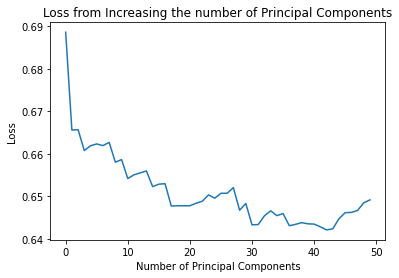

In [16]:
# Plot cross-validation results    
fig = plt.figure()
fig.set_facecolor('white')
plt.plot(loss)
plt.xlabel('Number of Principal Components')
plt.ylabel('Loss')
plt.title('Loss from Increasing the number of Principal Components')

pc_num = loss.index(min(loss))
print("Minimum loss at PC: " + str(pc_num))

In [17]:
# scale the training and testing data
X_reduced_train = pd.DataFrame(pca.fit_transform(scale(X_train_genes))[:,:17])
X_reduced_train.columns = [str(col) + '_x' for col in X_reduced_train.columns]
X_reduced_test = pd.DataFrame(pca.transform(scale(X_test_genes))[:,:17])
X_reduced_test.columns = [str(col) + '_x' for col in X_reduced_test.columns]

clinical_df_train = X_train_scaled[np.setdiff1d(X_train_scaled.columns, X_train_genes.columns)]
clinical_df_test = X_test_scaled[np.setdiff1d(X_test_scaled.columns, X_test_genes.columns)]

X_train_all_PCA = pd.concat([clinical_df_train.reset_index(drop=True), X_reduced_train.reset_index(drop=True)], axis=1)
X_test_PCA = pd.concat([clinical_df_test.reset_index(drop=True), X_reduced_test.reset_index(drop=True)], axis=1)

In [18]:
# Training/Validation split
np.random.seed(123)
X_train_PCA, X_valid_PCA, y_train, y_valid = train_test_split(X_train_all_PCA,y_train_all, train_size = 0.8/0.9)
np.random.seed(123)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_scaled, y_train_all, train_size = 0.8/0.9)

In [19]:
print("PCA datasets:")
print(X_train_PCA.shape), print(y_train.shape)
print(X_valid_PCA.shape), print(y_valid.shape)
print(X_test_PCA.shape), print(y_test.shape)

print("Full datasets:")
print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

PCA datasets:
(1009, 75)
(1009,)
(127, 75)
(127,)
(127, 75)
(127,)
Full datasets:
(1009, 1124)
(1009,)
(127, 1124)
(127,)
(127, 1124)
(127,)


(None, None)

In [20]:
X_train.to_csv("./Split_Data/X_train.csv", index = False)
y_train.to_csv("./Split_Data/y_train.csv", index = False)
X_valid.to_csv("./Split_Data/X_valid.csv", index = False)
y_valid.to_csv("./Split_Data/y_valid.csv", index = False)
X_test_scaled.to_csv("./Split_Data/X_test.csv", index = False)
y_test.to_csv("./Split_Data/y_test.csv", index = False)

X_train_PCA.to_csv("./Split_Data/X_train_PCA.csv", index = False)
X_valid_PCA.to_csv("./Split_Data/X_valid_PCA.csv", index = False)
X_test_PCA.to_csv("./Split_Data/X_test_PCA.csv", index = False)